In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/RNN/test_dataset.csv')
df_validation = pd.read_csv('/content/drive/MyDrive/RNN/validation_dataset.csv')
df_test = pd.read_csv('/content/drive/MyDrive/RNN/test_dataset.csv')



In [ ]:
# Inspect datasets
print("Train Dataset:")
print(df_train.head())
print(df_train.info())

#print("Validation Dataset:")
#print(df_validation.head())
#print(df_validation.info())

print("Test Dataset:")
#print(df_test.head())
print(df_test.info())

# Check class balance
#print("Emotion Distribution in Train Dataset:")
#print(df_train['label_name'].value_counts())

Train Dataset:
                                                text  label label_name
0  i really do want to believe that it s a misund...      2       love
1  i was at the point in my life where i needed t...      1        joy
2  i alternate between feeling sympathetic toward...      2       love
3                              im feeling very proud      1        joy
4  i havent really posted anything on fashion for...      0    sadness
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41681 entries, 0 to 41680
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        41681 non-null  object
 1   label       41681 non-null  int64 
 2   label_name  41681 non-null  object
dtypes: int64(1), object(2)
memory usage: 977.0+ KB
None
Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41681 entries, 0 to 41680
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      -------------- 

Emotion Distribution with Percentages:
            Count  Percentage
label_name                   
joy         14127   33.893141
sadness     12062   28.938845
anger        5680   13.627312
fear         4771   11.446462
love         3485    8.361124
surprise     1556    3.733116


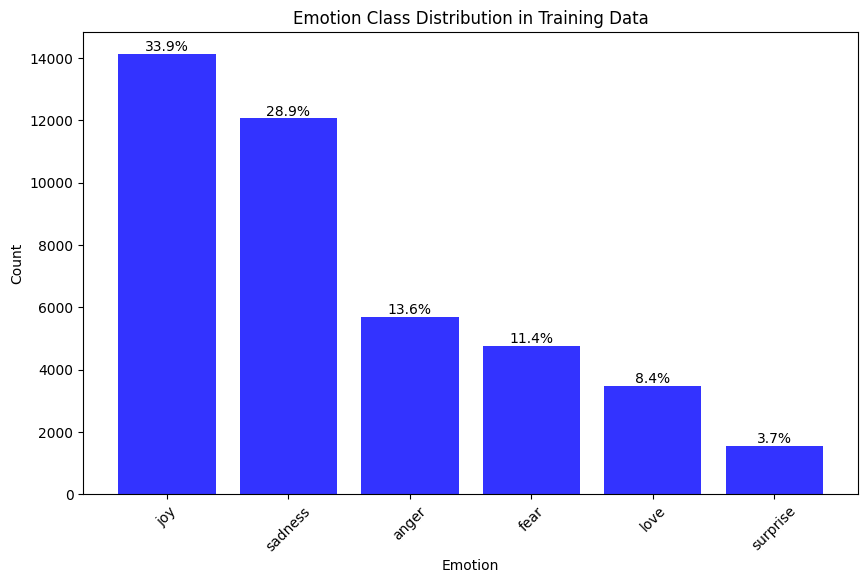

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of emotions
emotion_counts = df_train['label_name'].value_counts()
emotion_percentages = (emotion_counts / len(df_train)) * 100

# Combine counts and percentages into a single DataFrame for display
emotion_distribution = pd.DataFrame({
    'Count': emotion_counts,
    'Percentage': emotion_percentages
})

# Display the distribution with percentages
print("Emotion Distribution with Percentages:")
print(emotion_distribution)

# Bar plot showing counts with percentage annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(emotion_distribution.index, emotion_distribution['Count'], color='blue', alpha=0.8)
plt.title('Emotion Class Distribution in Training Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate percentages on the bars
for bar, percentage in zip(bars, emotion_distribution['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


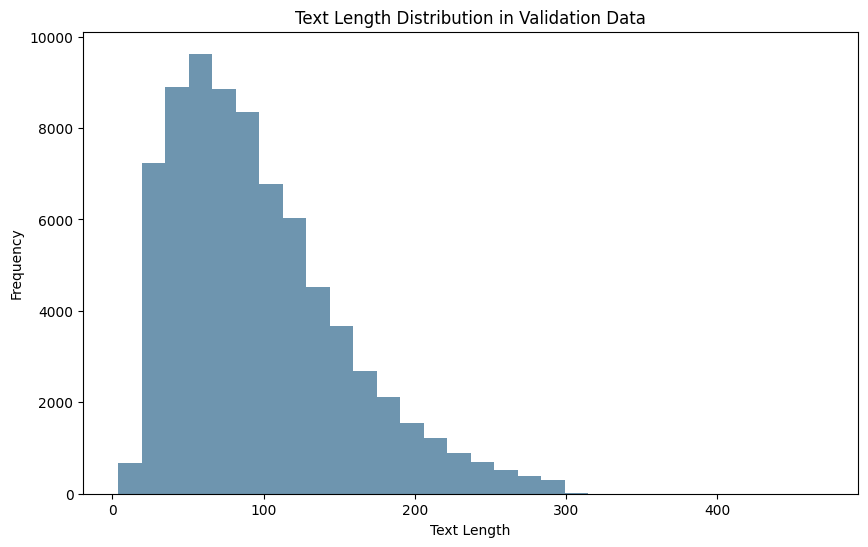

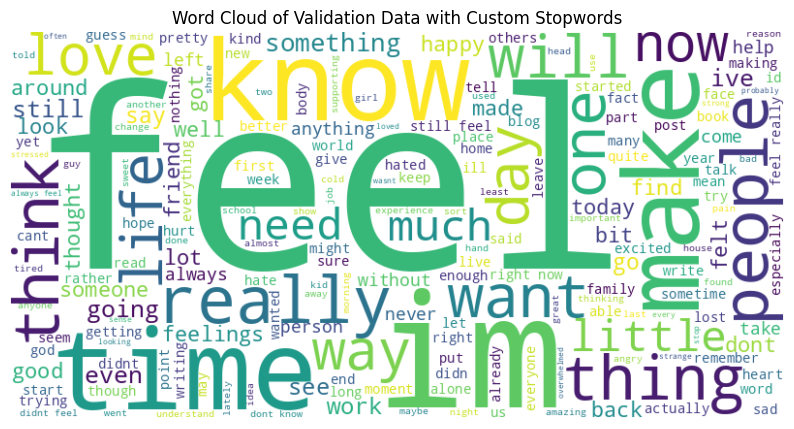

In [ ]:
# Add a column for text length
df_validation['text_length'] = df_validation['text'].apply(len)

# Histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df_validation['text_length'], bins=30, color='#31688E', alpha=0.7)
plt.title('Text Length Distribution in Validation Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

from wordcloud import WordCloud, STOPWORDS
import re

# Combine all text for the word cloud
text_combined = ' '.join(re.sub(r'[^\w\s]', '', t).lower() for t in df_validation['text'].dropna().values)



# Define custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["don", "S", "ve", "U", "u", "t", "co", "href", "m", "s", "feeling", "feeling.", "feeling,",])  # Add custom stopwords here

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords  # Use custom stopwords
).generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Validation Data with Custom Stopwords')
plt.show()



<ipython-input-9-b55950df2ebc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_name', y='text_length', data=df_validation, palette='Set3')


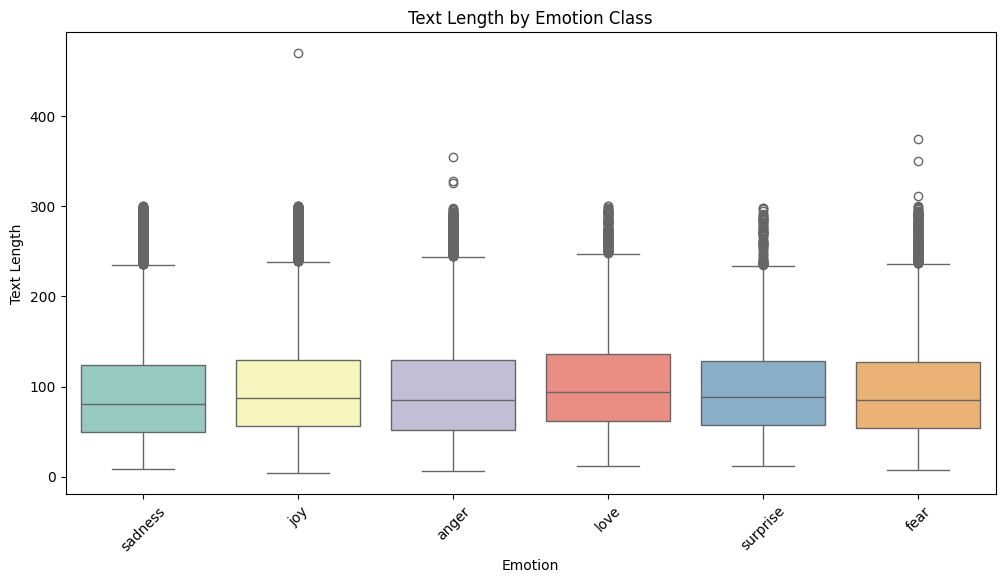

In [ ]:
import seaborn as sns

# Boxplot of text length by emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='label_name', y='text_length', data=df_validation, palette='Set3')
plt.title('Text Length by Emotion Class')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()


Emotion Distribution in Training Dataset:
            Count  Percentage
label_name                   
joy         14127   33.893141
sadness     12062   28.938845
anger        5680   13.627312
fear         4771   11.446462
love         3485    8.361124
surprise     1556    3.733116


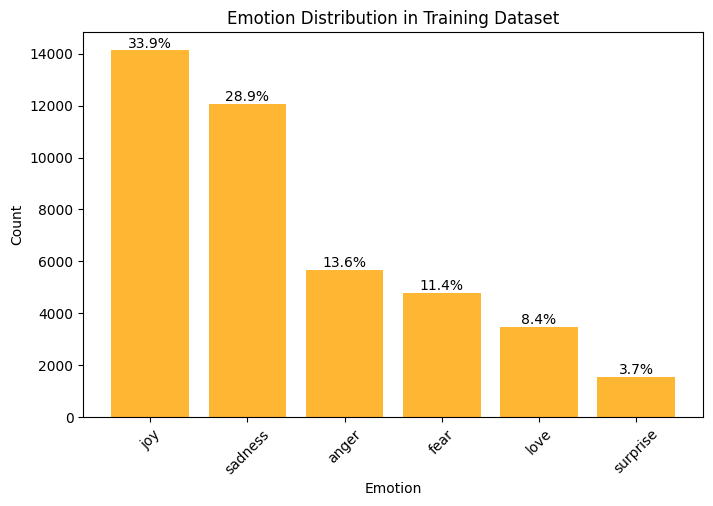

Emotion Distribution in Validation Dataset:
            Count  Percentage
label_name                   
joy         25549   34.053528
sadness     21778   29.027271
anger       10259   13.673926
fear         8582   11.438701
love         6161    8.211820
surprise     2697    3.594754


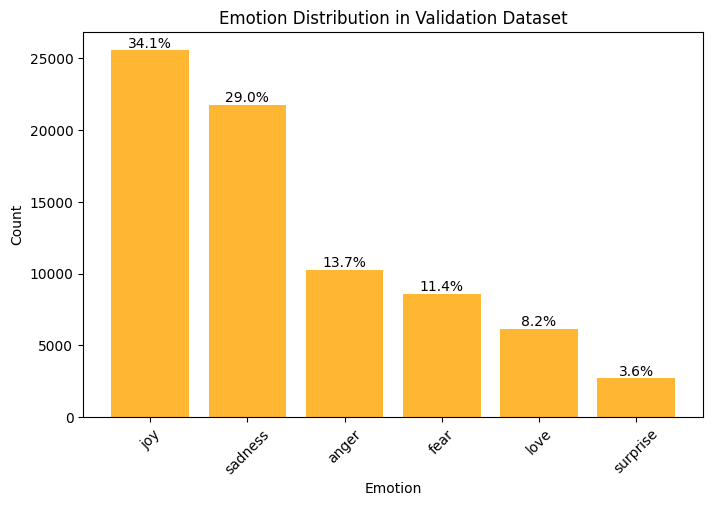

Emotion Distribution in Test Dataset:
            Count  Percentage
label_name                   
joy         14127   33.893141
sadness     12062   28.938845
anger        5680   13.627312
fear         4771   11.446462
love         3485    8.361124
surprise     1556    3.733116


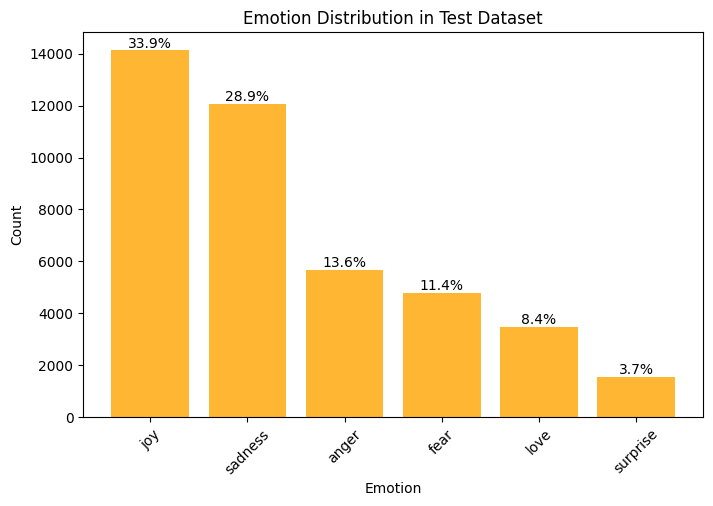

In [ ]:
import matplotlib.pyplot as plt

# Function to calculate and plot emotion distribution with percentages
def plot_emotion_distribution_with_percentages(df, dataset_name):
    # Calculate counts and percentages
    emotion_counts = df['label_name'].value_counts()
    emotion_percentages = (emotion_counts / len(df)) * 100

    # Combine counts and percentages into a single DataFrame for display
    emotion_distribution = pd.DataFrame({
        'Count': emotion_counts,
        'Percentage': emotion_percentages
    })

    # Display the distribution with percentages
    print(f"Emotion Distribution in {dataset_name} Dataset:")
    print(emotion_distribution)

    # Plot
    plt.figure(figsize=(8, 5))
    bars = plt.bar(emotion_distribution.index, emotion_distribution['Count'], color='orange', alpha=0.8)
    plt.title(f'Emotion Distribution in {dataset_name} Dataset')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Annotate percentages on the bars
    for bar, percentage in zip(bars, emotion_distribution['Percentage']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

# Plot distributions for all datasets
plot_emotion_distribution_with_percentages(df_train, "Training")
plot_emotion_distribution_with_percentages(df_validation, "Validation")
plot_emotion_distribution_with_percentages(df_test, "Test")


In [ ]:

plt.figure(figsize=(12, 6))

# Define color-blind-friendly colors
#colors = ['#117733', '#44AA99', '#88CCEE']  # Green, teal, blue
colors = ['#440154', '#31688E', '#35B779']  # Purple, blue, green
# Plot for training set
sns.histplot(df_train['text_length'], bins=100, kde=False, color=colors[0], alpha=0.6, label='Train')

# Plot for validation set
sns.histplot(df_validation['text_length'], bins=100, kde=False, color=colors[1], alpha=0.6, label='Validation')

# Plot for test set
sns.histplot(df_test['text_length'], bins=100, kde=False, color=colors[2], alpha=0.6, label='Test')

# Add titles and labels
plt.title("Text Length Distribution", fontsize=14)
plt.xlabel("Text Length (Number of Characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 400)  # Adjusted x-axis range
plt.legend(title="Dataset Split", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()



KeyError: 'text_length'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df_validation.isnull().sum()

# Display columns with missing values
print("Missing values per column:")
print(missing_values)



Missing values per column:
text           0
label          0
label_name     0
text_length    0
dtype: int64


<ipython-input-22-92fccfdb9633>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts, y=top_words, palette="viridis")


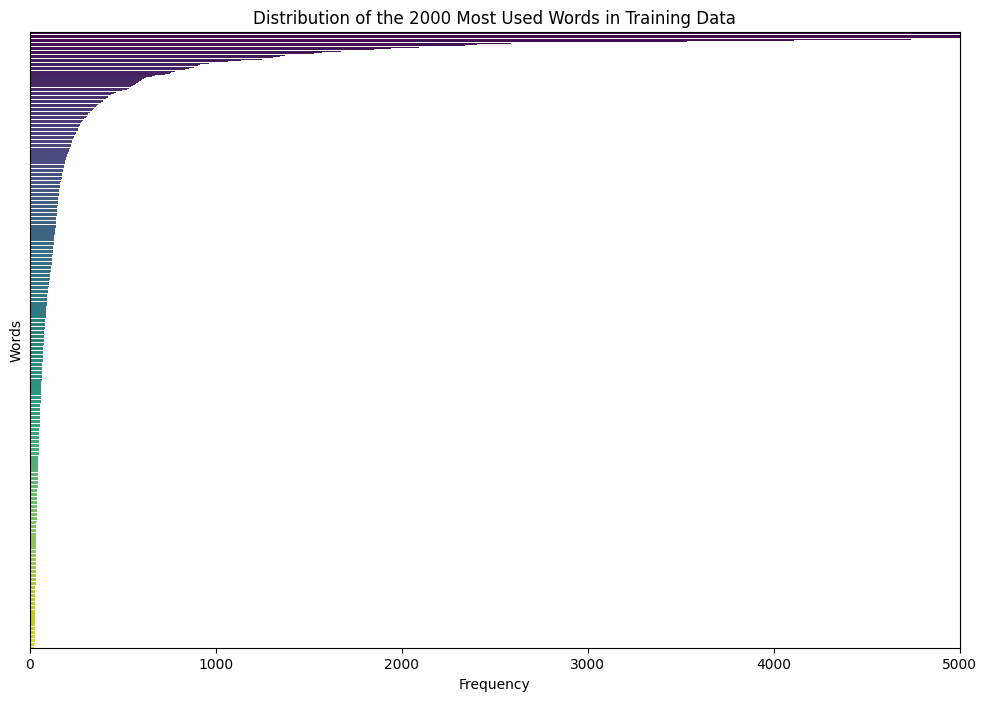

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    return text

df_train['processed_text'] = df_train['text'].apply(preprocess_text)

all_words = ' '.join(df_train['processed_text']).split()
word_counts = Counter(all_words)
top_1500_words = word_counts.most_common(2000)

top_words = [word[0] for word in top_1500_words]
top_counts = [word[1] for word in top_1500_words]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_counts, y=top_words, palette="viridis")
plt.title("Distribution of the 2000 Most Used Words in Training Data")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.yticks([])
plt.xlim(0, 5000)
plt.show()

